In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline  

from utils.archiver import *

In [2]:
def plot_cube(cube, title="", cmap="jet", savefile=None, log=False):
    N = cube.shape[-1]
    n = int(np.ceil(np.sqrt(N)))
    m = int(np.ceil(N / float(n)))
    assert N <= n*m
    assert n <= 8
    
    vmin = np.min(cube)
    vmax = np.max(cube)
    
    norm = None
    if log:
        norm = LogNorm(vmin=vmin, vmax=vmax)
    
    plt.figure(figsize=(16,16))
    plt.title(title)
    for i in xrange(1,N):
        plt.subplot(n,m,i)
        plt.imshow(cube[:,:,i], interpolation="nearest",
                   cmap=cmap, 
                   vmin=vmin,
                   vmax=vmax,
                   norm=norm,)
        plt.colorbar()
    if savefile:
        plt.savefig(save)

In [48]:
unarch = Unarchiver('/home/epz/scratch/plane_refine.data')
NXY = 8+1
NT = 8+1
A = 4
I = 2+1


In [49]:
primals = unarch.primals
print primals.shape
assert 3 == primals.ndim
assert NXY * NXY * NT + 1 == primals.shape[0], "{} != {}".format( NXY * NXY * NT + 1, primals.shape[0])
assert A == primals.shape[1]
assert I == primals.shape[2]

iter_slice = 0

(730, 4, 3)


(9, 9, 9)


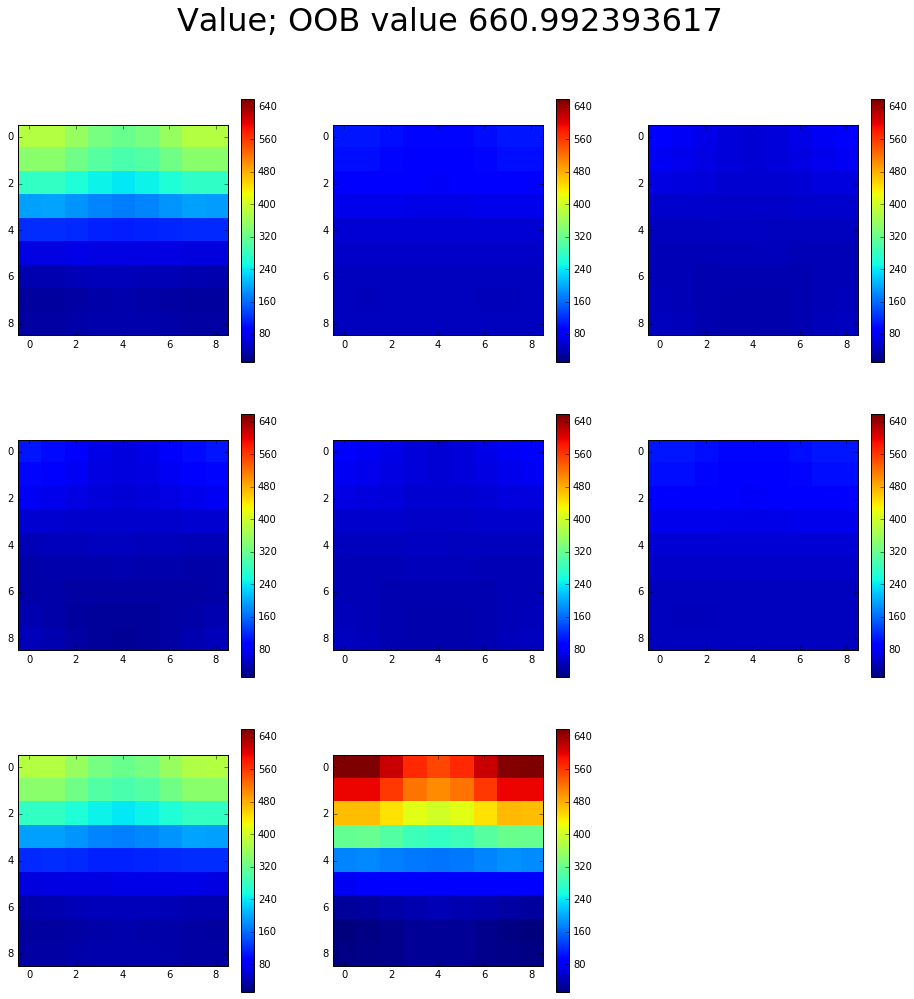

In [50]:
value = primals[:, 0, iter_slice]
oob_value = value[-1]
value = np.reshape(value[:-1], (NXY, NXY, NT))
print(value.shape)
plot_cube(value)
plt.suptitle('Value; OOB value {}'.format(oob_value), fontsize=32)


In [ ]:
flows = primals[:-1, 1:, iter_slice]
pi = np.reshape(np.argmax(flows,axis=1), (NXY,NXY,NT))

plot_cube(pi, cmap='viridis')
plt.suptitle('Policy', fontsize=32)

In [ ]:
plt.suptitle('Advantage', fontsize=32)
flows = primals[:-1, 1:, iter_slice]
sorted_flow = np.sort(flows,axis=1)
adv = sorted_flow[:,-1] - sorted_flow[:,-2]
plot_cube(np.reshape(adv, (NXY,NXY,NT)), cmap='plasma')


In [ ]:
basis = unarch.added_bases
print(basis.shape)

In [ ]:
duals = unarch.duals
residuals = duals[:-1, 1:, iter_slice]

In [ ]:
plot_cube(np.log(np.reshape(flows[:,1] * residuals[:,1], (NXY,NXY,NT))))
plt.suptitle('Complementarity; Action 0', fontsize=32)

In [ ]:
plot_cube(np.log(np.reshape(flows[:,1] * residuals[:,1], (NXY,NXY,NT))))
plt.suptitle('Complementarity; Action 1', fontsize=32)

In [ ]:
plot_cube(np.log(np.reshape(flows[:,2] * residuals[:,2], (NXY,NXY,NT))))
plt.suptitle('Complementarity; Action 2', fontsize=32)

In [ ]:
bellman = unarch.residuals
print bellman.shape


In [ ]:
plot_cube(np.reshape(np.abs(bellman[:-1, iter_slice]), (NXY,NXY,NT)))
plt.suptitle('Bellman Residual', fontsize=32)

In [ ]:
max_res = np.log(np.abs(np.max(residuals, axis=1)))
max_res = np.reshape(max_res, (NXY,NXY,NT))
plot_cube(max_res)
plt.suptitle('Max Residual', fontsize=32)

In [43]:
unarch = Unarchiver('/home/epz/scratch/basis.data')
B = unarch.basis
print B.shape

(730, 29)


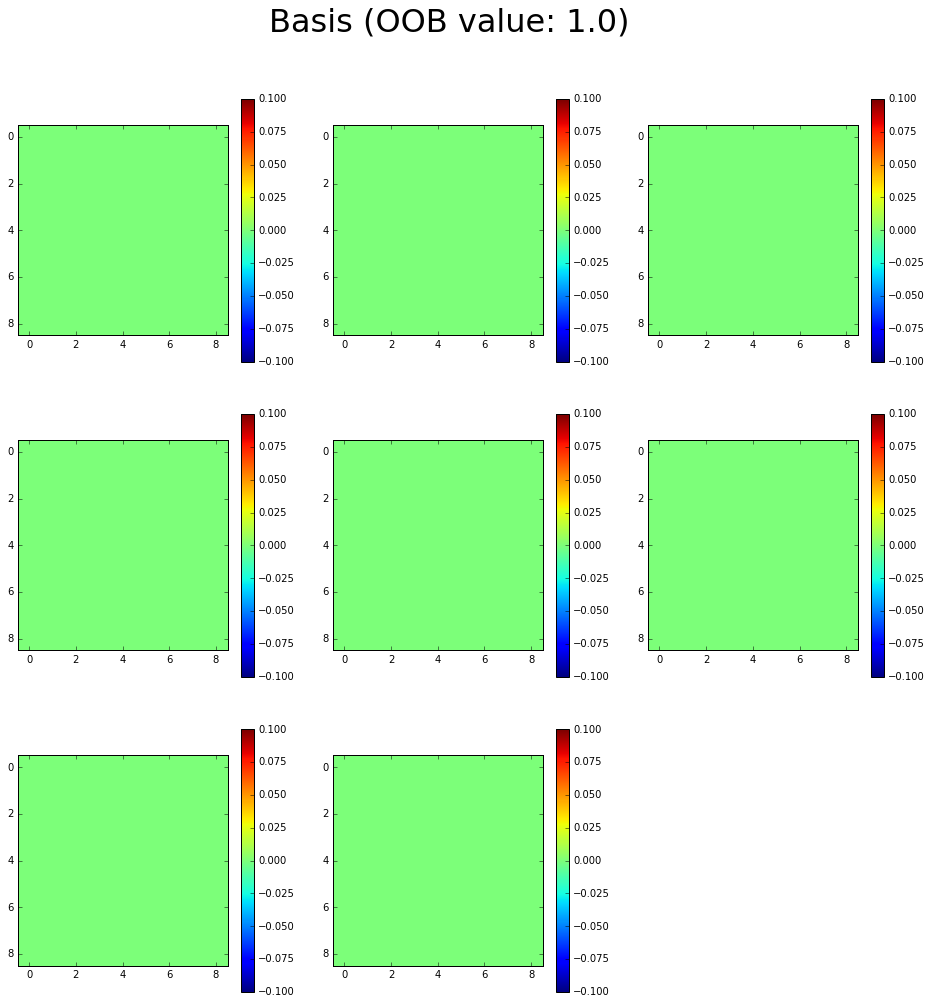

In [47]:
#b = np.log(np.abs(B[:,1]) + 1e-22)
b = B[:,-1]
plot_cube(np.reshape(b[:-1], (NXY,NXY,NT)))
plt.suptitle('Basis (OOB value: {})'.format(b[-1]), fontsize=32)